In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv


In [2]:
df=pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df1=df[['HelpfulnessNumerator','HelpfulnessDenominator','Score','Summary','Text']]


In [5]:
df1.head()


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df1['NotHelpful']=df1['HelpfulnessDenominator'] - df1['HelpfulnessNumerator']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   HelpfulnessNumerator    568454 non-null  int64 
 1   HelpfulnessDenominator  568454 non-null  int64 
 2   Score                   568454 non-null  int64 
 3   Summary                 568427 non-null  object
 4   Text                    568454 non-null  object
 5   NotHelpful              568454 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 26.0+ MB


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,NotHelpful
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,0
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,0


In [9]:
X=df1[['HelpfulnessNumerator','NotHelpful','Text','Summary']]


In [10]:
y=df1['Score']


In [11]:
y.head()


0    5
1    1
2    4
3    2
4    5
Name: Score, dtype: int64

In [12]:
X.head()

,HelpfulnessNumerator,NotHelpful,Text,Summary
0,1,0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,0,0,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,1,0,This is a confection that has been around a fe...,"""Delight"" says it all"
3,3,0,If you are looking for the secret ingredient i...,Cough Medicine
4,0,0,Great taffy at a great price. There was a wid...,Great taffy


In [13]:
import seaborn as sbn
import matplotlib.pyplot as plt


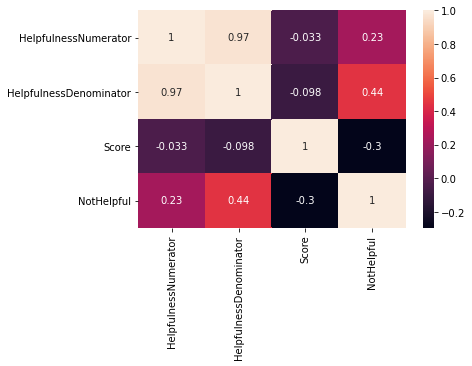

In [14]:

corr=df1.corr()
sbn.heatmap(corr,annot=True)


In [15]:
X.shape
X.isnull().sum()

HelpfulnessNumerator     0
NotHelpful               0
Text                     0
Summary                 27
dtype: int64

In [16]:
work=X['Text']
work.head
work.isnull().any()
len(work)
X.shape

(568454, 4)

In [17]:
from textblob import TextBlob

scores=[]
for i in range(0,len(work)):
    scores.append(TextBlob(work[i]).sentiment.polarity)

In [22]:
X.shape


(568454, 4)

In [23]:
len(scores)
X['sentiment score']=scores

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
X1=X[['HelpfulnessNumerator','NotHelpful','sentiment score']]


In [25]:
X1.head()


,HelpfulnessNumerator,NotHelpful,sentiment score
0,1,0,0.450000
1,0,0,-0.033333
2,1,0,0.133571
3,3,0,0.166667
4,0,0,0.483333


In [26]:
y.head()

0    5
1    1
2    4
3    2
4    5
Name: Score, dtype: int64

In [27]:
eda=X1
eda['y']=y
eda.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,HelpfulnessNumerator,NotHelpful,sentiment score,y
0,1,0,0.450000,5
1,0,0,-0.033333,1
2,1,0,0.133571,4
3,3,0,0.166667,2
4,0,0,0.483333,5


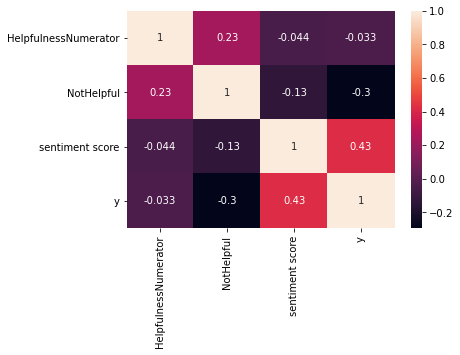

In [28]:
corr=eda.corr()
sbn.heatmap(corr,annot=True)

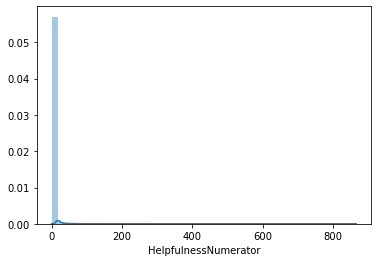

In [29]:
sbn.distplot(X['HelpfulnessNumerator'],kde=True)


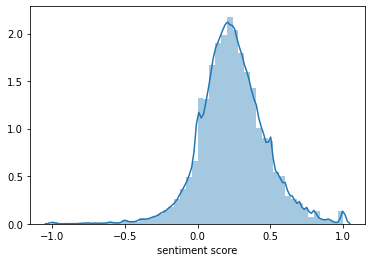

In [30]:
sbn.distplot(X['sentiment score'])


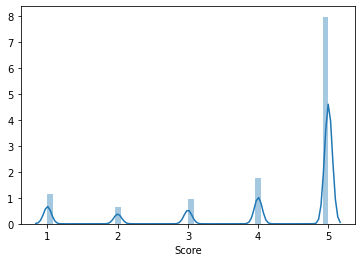

In [31]:
sbn.distplot(y,kde=True)


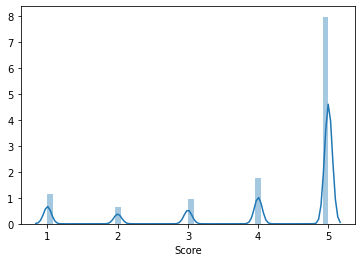

In [32]:
sbn.distplot(y)


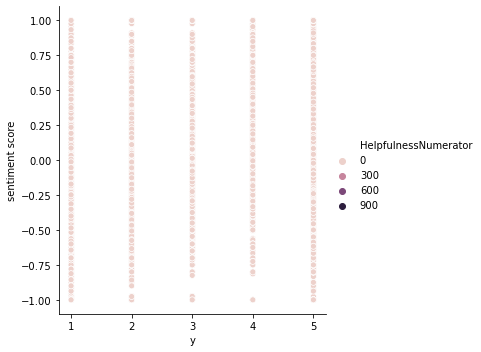

In [33]:
sbn.relplot(x='y',y='sentiment score',hue='HelpfulnessNumerator',data=eda)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.1, random_state = 0)

In [35]:
from xgboost import XGBRegressor
regressor=XGBRegressor(n_estimators=1000,max_depth =3)
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [36]:
y_pred=regressor.predict(X_test)
print(y_pred)

[4.999999  4.999999  4.999999  ... 3.0000002 4.999999  2.0000014]


In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 2)
accuracies.mean()

0.9999999997986463